## <div style="text-align: center; color: green;">Project Title: Airbnb Price Prediction</div>

### <div style="color: gray;">Step 1: Exploratory Data Analysis (EDA)-</div>

#### <div style="color: blue;">1. Understand the Dataset:</div>

In [1]:
#Import necessary libraries

# Import the numerical algebra libs
import pandas as pd
import numpy as np

# Import visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

# Import score libs
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset

data = pd.read_csv('/kaggle/input/airbnb/airbnb.csv')
data.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [3]:
#Dataset Columns

data.columns

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')

In [4]:
#Dataset Shape

data.shape

(12805, 23)

In [5]:
#Transposed summary

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12805.0,6.402000e+03,3.696629e+03,0.0,3201.0,6402.0,9603.0,1.280400e+04
id,12805.0,7.525187e+16,2.007933e+17,13131.0,20239582.0,36822288.0,49997600.0,7.017905e+17
host_id,12805.0,1.638192e+08,1.413622e+08,23039.0,37000317.0,125645881.0,263962254.0,4.758973e+08
price,12805.0,1.769780e+04,4.569364e+04,393.0,3994.0,8175.0,16062.0,1.907963e+06
bathrooms,12805.0,1.874424e+00,2.091399e+00,0.0,1.0,1.0,2.0,5.000000e+01
beds,12805.0,3.316751e+00,4.037791e+00,0.0,1.0,2.0,4.0,9.800000e+01
guests,12805.0,5.213745e+00,3.808830e+00,1.0,2.0,4.0,6.0,1.600000e+01
toiles,12805.0,1.921125e-02,1.372722e-01,0.0,0.0,0.0,0.0,1.000000e+00
bedrooms,12805.0,2.136041e+00,2.359005e+00,0.0,1.0,1.0,3.0,5.000000e+01
studios,12805.0,2.358454e-02,1.517567e-01,0.0,0.0,0.0,0.0,1.000000e+00


In [6]:
#information summary 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

##### Observation:

**Size:** 12,805 rows (listings) × 23 columns (features)

**Target Variable:** price (price per night in local currency)


- **Key Columns Analysis**
  - 1. Numeric Features (Potential Predictors):
    - **rating** (average rating)
    - **reviews** (number of reviews)
    - **bathrooms**, **beds**, **guests**, **toilets**, **bedrooms**, **studios** (capacity features)
    
  - 2. Categorical Features:
    - **country** (geographic location)
    - **checkin/checkout** times (might be useful)
    - **host_name** (though probably not useful directly)
    
  - 3. Text Features (for NLP analysis):
     - **name** (listing title)
     - **features** (summary text)
     - **amenities** (list of amenities)
  
  - 4. Identifier Columns:
    - **id**, **host_id** (probably not useful for modeling)


In [7]:
#missing values

data.isnull().sum()

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

##### Observation: 

- `host_name`: 8 missing
- `checkin`: 800 missing
- `checkout`: 2,450 missing

#### <div style="color: blue;">2. Check Data Distribution:</div>

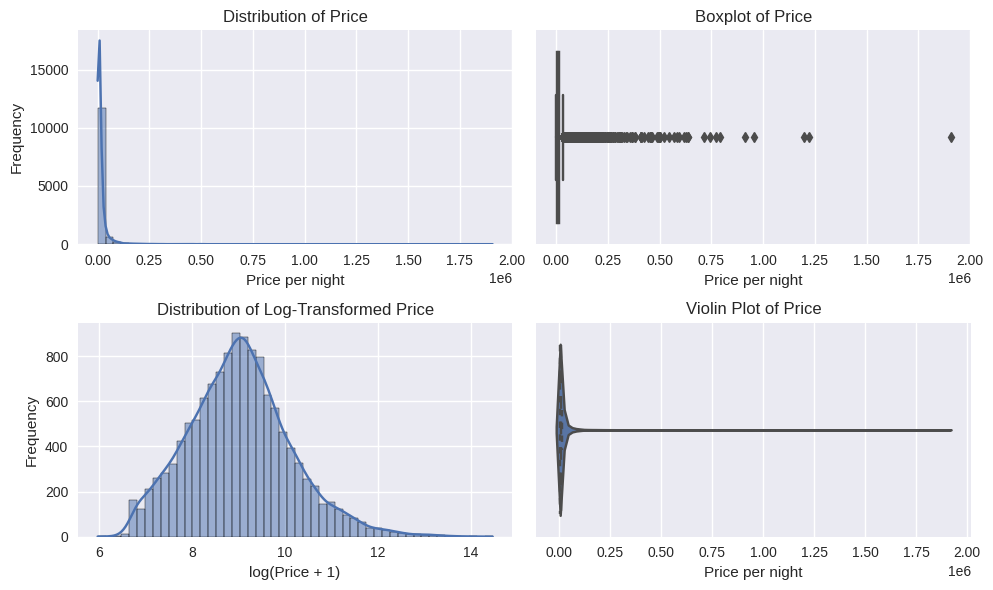

In [8]:
#distribution of the target variable (price)

# Set up the visualization style
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Histogram of price
plt.subplot(2, 2, 1)
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Boxplot of price
plt.subplot(2, 2, 2)
sns.boxplot(x=data['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price per night')

# Log-transformed price (often helps with right-skewed distributions)
plt.subplot(2, 2, 3)
sns.histplot(np.log1p(data['price']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('log(Price + 1)')
plt.ylabel('Frequency')

# Violin plot of price
plt.subplot(2, 2, 4)
sns.violinplot(x=data['price'], inner="quartile")
plt.title('Violin Plot of Price')
plt.xlabel('Price per night')

plt.tight_layout()
plt.show()

##### Observationon:

- Likely right-skewed distribution (most listings at lower prices, few very expensive ones)
- Potential outliers in the upper range
- Log transformation often helps normalize such distributions for modeling

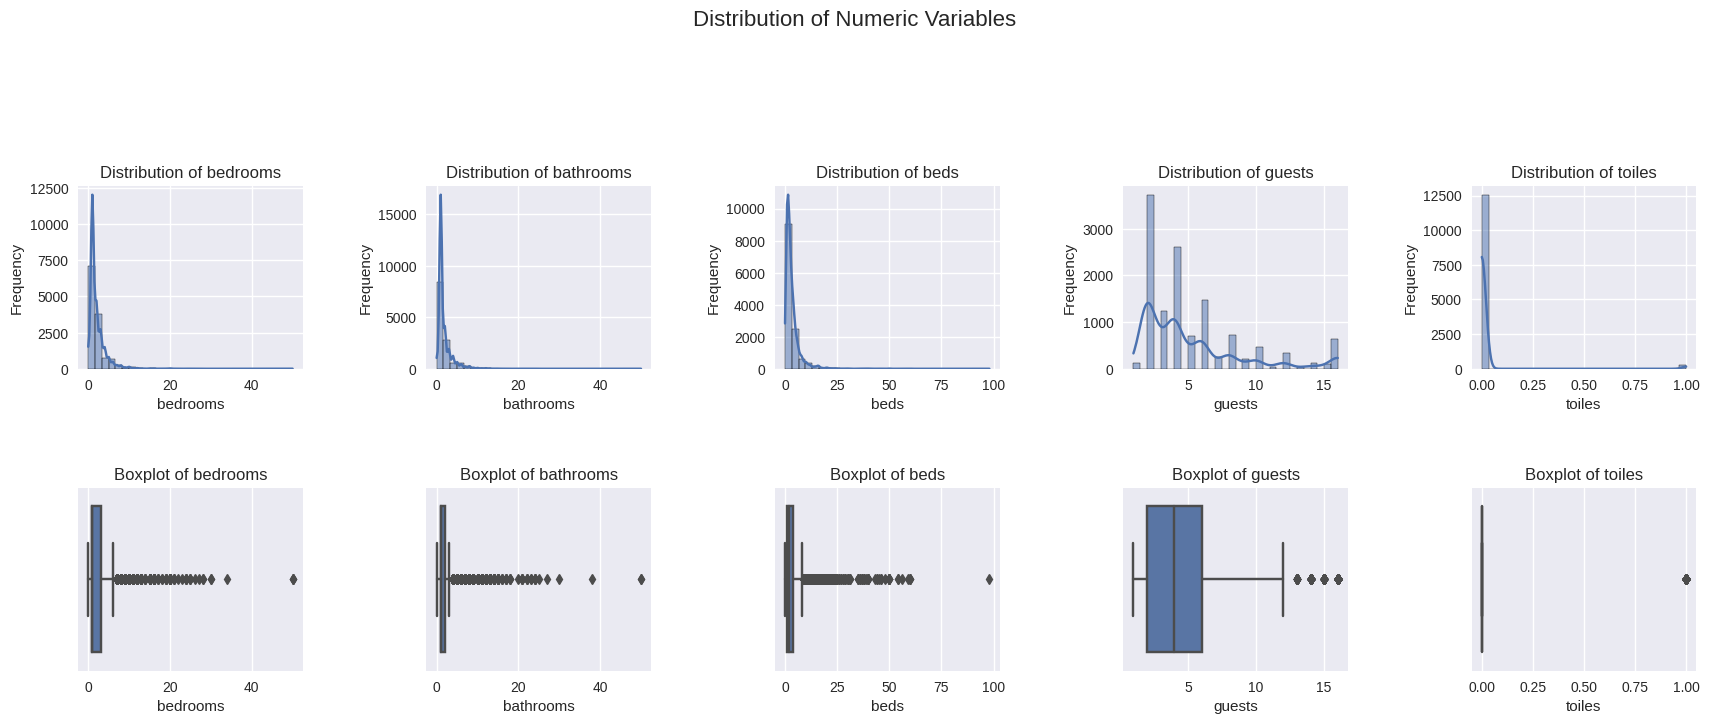

In [9]:
#distribution of the numeric variables

# List of numerical columns
num_cols = ['bedrooms', 'bathrooms', 'beds', 'guests', 'toiles']

# Create a figure with subplots: 2 rows, N columns (one for hist, one for boxplot)
fig, axes = plt.subplots(2, len(num_cols), figsize=(18, 8))
fig.suptitle('Distribution of Numeric Variables', fontsize=16)

for i, col in enumerate(num_cols):
    # Histogram (Top row)
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')

    # Boxplot (Bottom row)
    sns.boxplot(x=data[col], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot of {col}')
    axes[1, i].set_xlabel(col)

plt.tight_layout(pad=4.0, rect=[0, 0.03, 1, 0.95])  # Adjust for title
plt.show()

##### Observation:

- All numeric variables (**bedrooms, bathrooms, beds, guests**) are right-skewed with most values clustered at the lower end and a few extreme outliers.
- Boxplots show outliers in all variables, especially for larger properties with high **room/guest** counts.
- **Toiles** has an unusual distribution.

#### <div style="color: blue;">3. Correlation Analysis:</div>

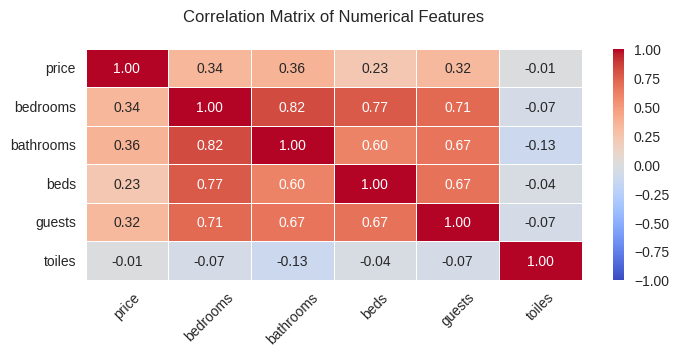

In [10]:
#Correlation Matrix

# Select numerical columns
num_features = ['price', 'bedrooms', 'bathrooms', 'beds', 'guests', 'toiles']
corr_matrix = data[num_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1,
            linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

##### Observation:

**Strong Positive Correlations**

- `bathrooms` & `bedrooms`
  - 0.82 
  - Larger homes tend to have both more bedrooms and bathrooms

- `beds` & `bedrooms`
  - 0.77
  - More beds = More rooms

- `beds` & `guests`
  - 0.67
  - More beds = higher guest capacity
  
- `price` & `bedrooms` & `bathrooms` & `guests`
  - 0.3
  - More bedrooms, bathrooms, guests generally mean higher prices

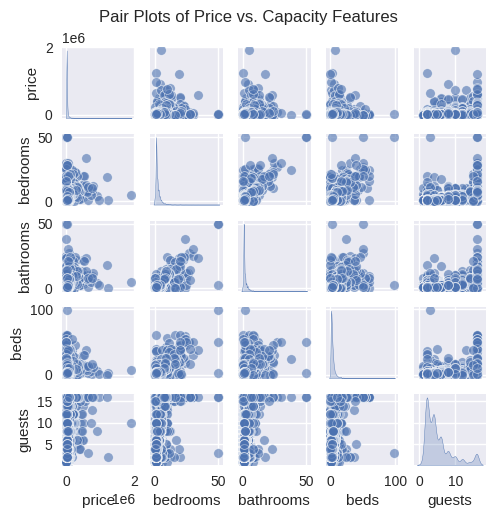

In [11]:
#Focus on features with strongest correlations to price using pair plot

sns.pairplot(data[['price', 'bedrooms', 'bathrooms', 'beds', 'guests']], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6},
             height=1,
             aspect=1)
plt.suptitle("Pair Plots of Price vs. Capacity Features", y=1.02)
plt.show()

##### Observations:

- `Non-linear relationships`: Price vs. bedrooms/bathrooms may follow a logarithmic trend like doubling bedrooms doesn’t always double price.
- `Clustering`: Many listings are 1-2 bedrooms/bathrooms (common for Airbnb).
- `Outliers`: A few listings have high capacity (>4 bedrooms) but mid-range prices.

#### <div style="color: blue;">4. Analyze Categorical Features:</div>

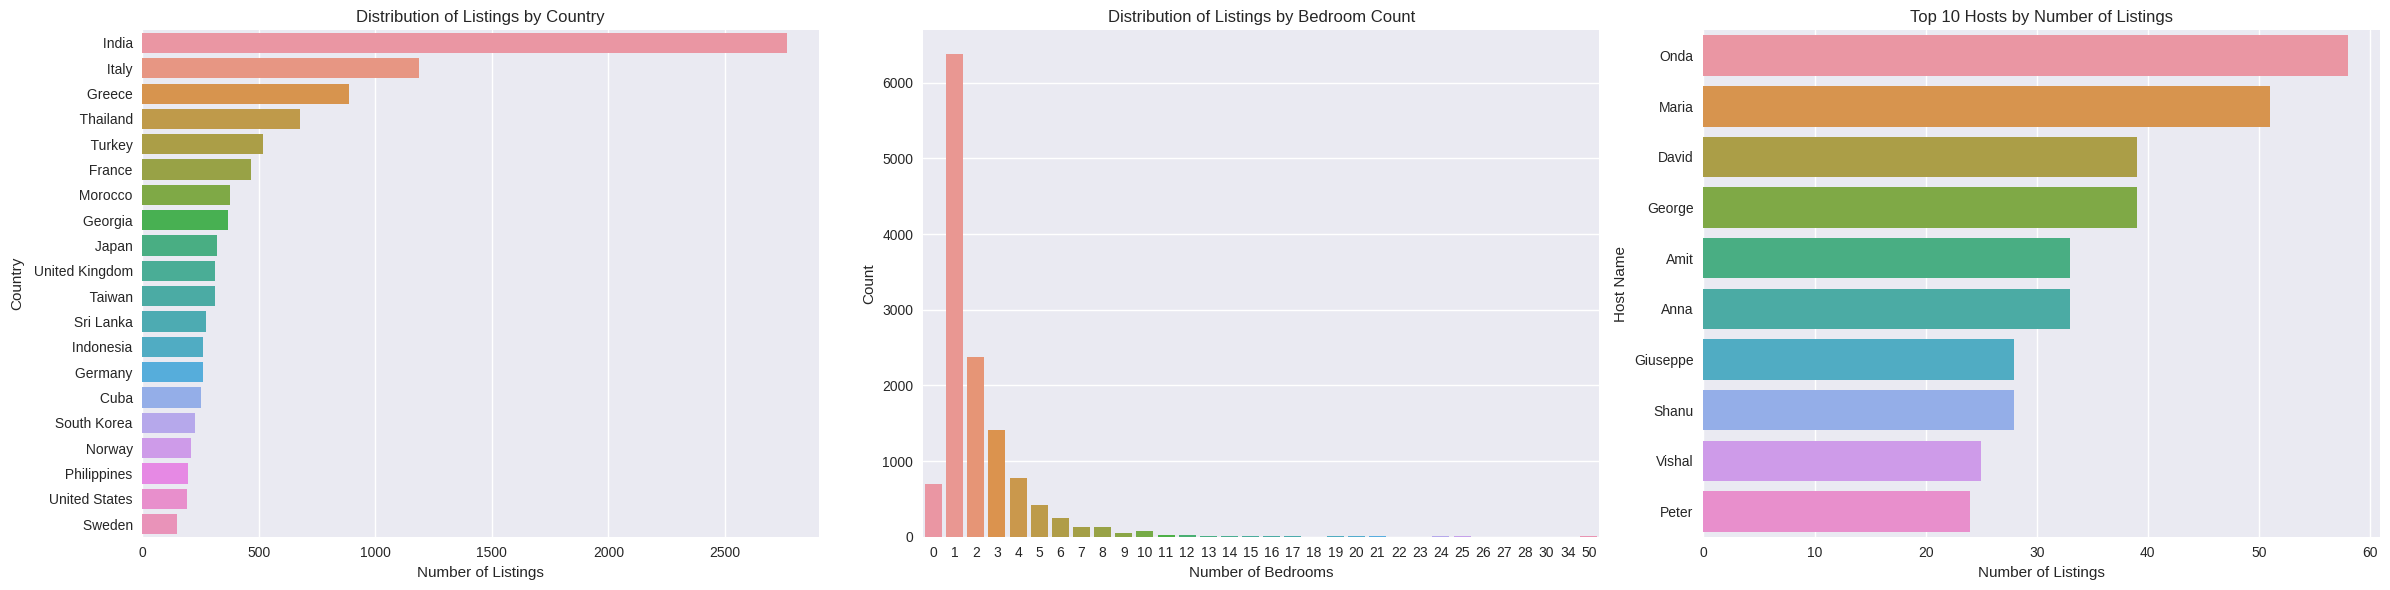

In [12]:
#Distribution of Categorical Features

# Create subplots in a single row
plt.figure(figsize=(24, 6))

#Country Distribution with Filter the data to only those countries
top_20_countries = data['country'].value_counts().nlargest(20).index
filtered_data = data[data['country'].isin(top_20_countries)]
plt.subplot(1, 3, 1)
sns.countplot(data=filtered_data, y='country', order=top_20_countries)
plt.title('Distribution of Listings by Country')
plt.xlabel('Number of Listings')
plt.ylabel('Country')

#Bedroom Distribution
plt.subplot(1, 3, 2)
sns.countplot(data, x='bedrooms', order=sorted(data['bedrooms'].unique()))
plt.title('Distribution of Listings by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

#Top Hosts
top_hosts = data['host_name'].value_counts().head(10)
plt.subplot(1, 3, 3)
sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')

plt.tight_layout()
plt.show()

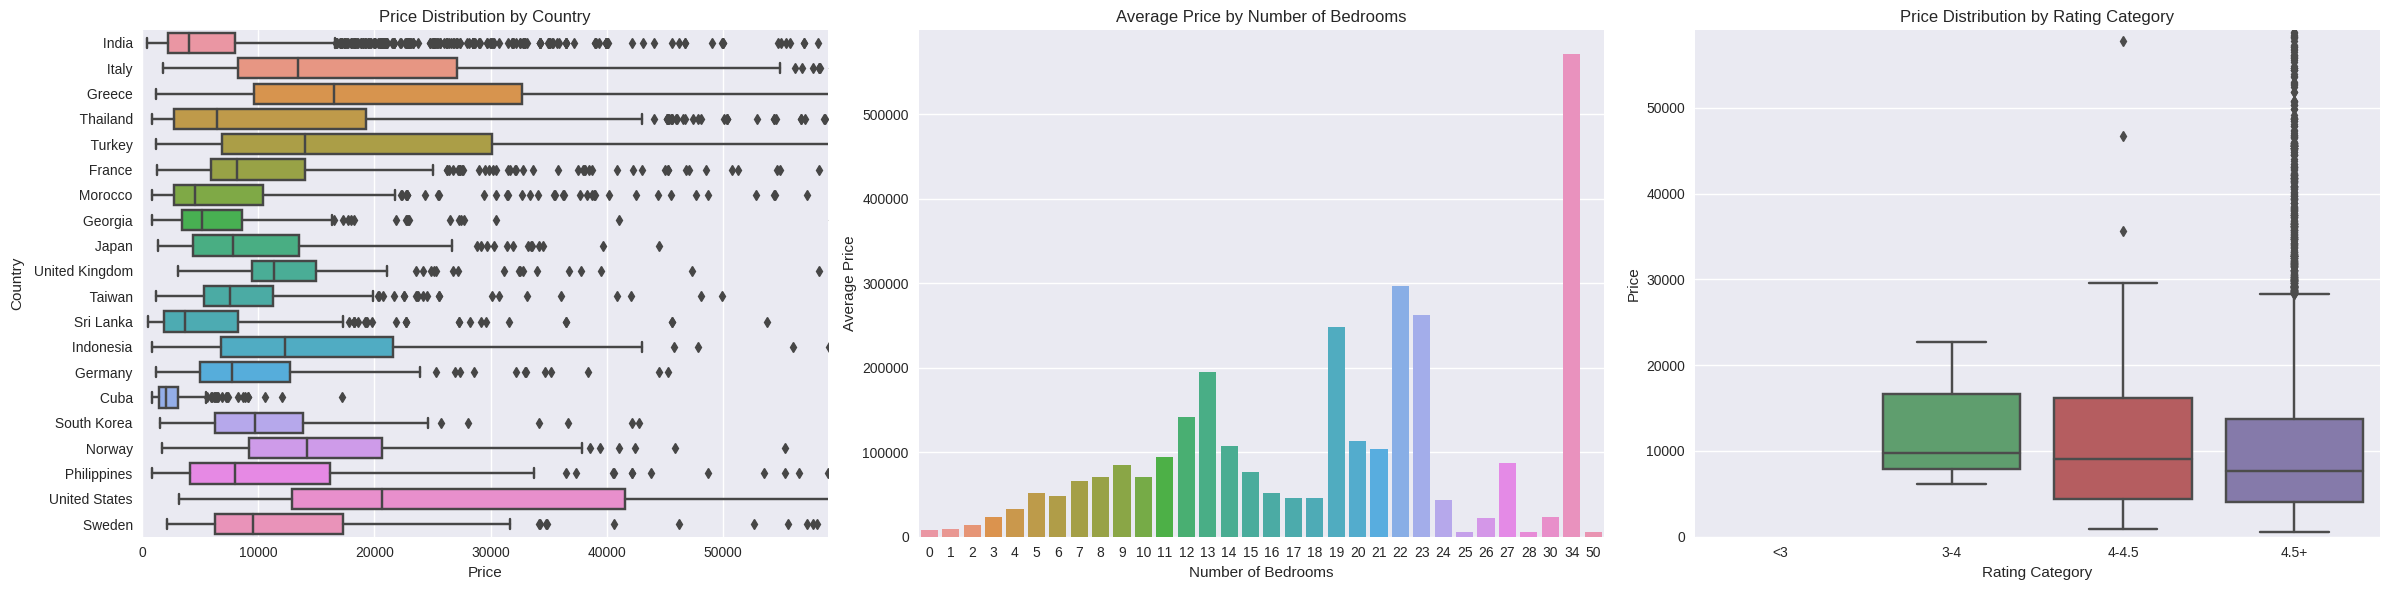

In [13]:
#Categorial features relation with Price

# Create subplots in a single row
plt.figure(figsize=(24, 6))

#Price by Country
top_20_countries = data['country'].value_counts().nlargest(20).index
filtered_data = data[data['country'].isin(top_20_countries)]
plt.subplot(1, 3, 1)
sns.boxplot(data= filtered_data, x='price', y='country', order= top_20_countries)
plt.title('Price Distribution by Country')
plt.xlabel('Price')
plt.ylabel('Country')
plt.xlim(0, data['price'].quantile(0.95))  # Remove extreme outliers

#Average Price by Bedrooms
bedroom_price = data.groupby('bedrooms')['price'].mean().reset_index()
plt.subplot(1, 3, 2)
sns.barplot(data=bedroom_price, x='bedrooms', y='price')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')

#Price vs Rating Categories
data['rating_category'] = pd.cut(data['rating'], 
                              bins=['0', '3', '4', '4.5', '5'],
                              labels=['<3', '3-4', '4-4.5', '4.5+'])

plt.subplot(1, 3, 3)
sns.boxplot(data, x='rating_category', y='price')
plt.title('Price Distribution by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Price')
plt.ylim(0, data['price'].quantile(0.95))

plt.tight_layout()
plt.show()

#Remove unwanted column rating_category
data.drop(['rating_category'], axis=1, inplace=True)

##### Observations:

- `Country Impact`:
  - Some countries show significantly higher median prices
  - Price distributions vary substantially between countries

- `Bedroom Influence`:
  - Clear positive relationship between bedrooms and price
  - Diminishing returns observed beyond 3-4 bedrooms

- `Rating Effect`:
  - Surprisingly weak correlation between rating categories and price
  - Highest-rated properties (4.5+) don't necessarily command premium prices

- `Host Analysis`:
  - Most hosts have few properties
  - Some "superhosts" with many listings may have different pricing strategies

### <div style="color: gray;">Step 2: Data Cleaning-</div>

#### <div style="color: blue;">1. Handle Missing Values:</div>

In [14]:
print(data.columns)

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')


In [15]:
# Calculate missing values per column
missing_values = data.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
host_name       8
checkin       800
checkout     2450
dtype: int64


In [16]:
# Fill with the most common (mode)

data['checkin'].fillna(data['checkin'].mode()[0], inplace=True)
data['checkout'].fillna(data['checkout'].mode()[0], inplace=True)
data['host_name'].fillna('Unknown', inplace=True)


missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0      0
id              0
name            0
rating          0
reviews         0
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
country         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
checkin         0
checkout        0
dtype: int64


#### <div style="color: blue;">2. Outlier Detection and Removal:</div>

In [17]:
#Remove unwanted column
columns_to_drop = [
    'Unnamed: 0',    # indexing column from CSV
    'id',            # unique identifier
    'name',          # optional: you can keep and extract keywords later
    'host_id',       # not useful for prediction
    'host_name',     # not useful
    'address',       # unless you're extracting location features
    'img_links',     # not useful
    'checkin',       # not useful
    'checkout',      # not useful
    'features',      # already expand into bathrooms, beds, guests, toiles and bedrooms columns
    'hourse_rules',  # less important for price prediction
]

data.drop(columns=columns_to_drop, inplace=True)

print(data.shape)
print(data.columns)

(12805, 12)
Index(['rating', 'reviews', 'amenities', 'safety_rules', 'price', 'country',
       'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios'],
      dtype='object')


In [18]:
# Outlier deletion and remove

def remove_outliers(data, column, threshold=1.5):
    """Remove outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Return filtered dataframe
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Columns to process (numerical features only)
data_numeric_cols = [col for col in data.columns if data[col].dtype in ['int64']]

# Before removal stats
original_shape = data.shape

# Remove outliers iteratively
for col in data_numeric_cols:
    data = remove_outliers(data, col)
    
# After removal stats
print(f"Original shape: {original_shape}")
print(f"New shape: {data.shape}")
print(f"Rows removed: {original_shape[0] - data.shape[0]}")
print(f"Percentage kept: {data.shape[0]/original_shape[0]*100:.2f}%")

Original shape: (12805, 12)
New shape: (9304, 12)
Rows removed: 3501
Percentage kept: 72.66%


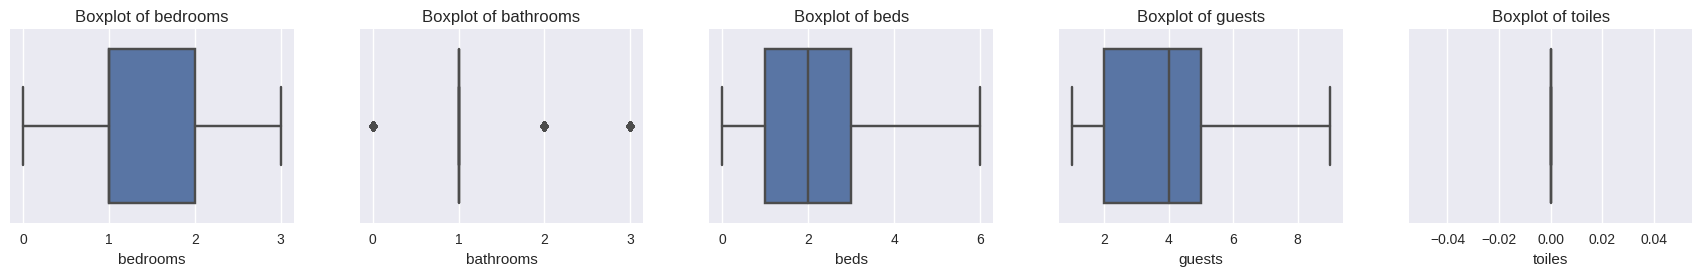

In [19]:
# To see cleaned data

#distribution of the numeric variables

# List of numerical columns
num_cols = ['bedrooms', 'bathrooms', 'beds', 'guests', 'toiles']

# Create a figure with subplots: 2 rows, N columns (one for hist, one for boxplot)
fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 4))

for i, col in enumerate(num_cols):

    # Boxplot (Bottom row)
    sns.boxplot(x=data[col], ax=axes[ i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(pad=4.0, rect=[0, 0.03, 1, 0.95])  # Adjust for title
plt.show()

##### Observations:

- `bedrooms`: No outliers; values mostly between 1 and 3.
- `bathrooms`: Few outliers above 2.5, most values within 1–2. No major issues seen.
- `beds`: Some mild outliers above 5, typical range is 2–4.
- `guests`: A few outliers above 8, most listings accommodate 2–6 guests.
- `toiles`: Nearly constant near zero, likely invalid or missing data.

#### <div style="color: blue;">3. Convert Categorical Features:</div>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9304 entries, 0 to 12804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        9304 non-null   object
 1   reviews       9304 non-null   object
 2   amenities     9304 non-null   object
 3   safety_rules  9304 non-null   object
 4   price         9304 non-null   int64 
 5   country       9304 non-null   object
 6   bathrooms     9304 non-null   int64 
 7   beds          9304 non-null   int64 
 8   guests        9304 non-null   int64 
 9   toiles        9304 non-null   int64 
 10  bedrooms      9304 non-null   int64 
 11  studios       9304 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 944.9+ KB


In [21]:
# Ordinal Encoding for rating

data['rating'] = data['rating'].replace('New', 0)  # Replace 'New' with 0

# Convert the 'rating' column to numeric, forcing errors to NaN, then fill NaNs with 0
data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)

# Convert the 'rating' column to int64
data['rating'] = data['rating'].round().astype('int64')

In [22]:
# Change DataType for reviews

# Remove non-numeric values safely
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')  # Converts invalid parsing to NaN
data['reviews'] = data['reviews'].fillna(0).astype('int64')        # Optionally replace NaNs with 0

In [23]:
#Convert Amenities into Count
data['num_amenities'] = data['amenities'].apply(lambda x: len(str(x).split(',')))
data.drop(columns=['amenities'], inplace=True)

In [24]:
# Label Encoding for Each unique country
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])

data['country'] = data['country'].astype('int64')

In [25]:
#TF-IDF for encoding Safety_rules(Dimensionality Reduction)
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Clean and extract meaningful items from safety_rules
def clean_safety_rules(val):
    if pd.isna(val): return []
    items = val.split(',')
    cleaned = [item.strip() for item in items 
               if item.strip() 
               and not item.startswith("\\U000") 
               and item.strip().lower() != "show more"]
    return cleaned

# Apply cleaning
data['safety_rules_list'] = data['safety_rules'].apply(clean_safety_rules)

# Step 2: Convert list to string (required for TF-IDF)
data['safety_rules_str'] = data['safety_rules_list'].apply(lambda x: ' '.join(x))

# Step 3: TF-IDF Vectorization (adjust max_features as needed)
vectorizer = TfidfVectorizer(max_features=30)  # You can increase this to 20, 50, etc.
safety_tfidf = vectorizer.fit_transform(data['safety_rules_str'])

# Step 4: Convert TF-IDF matrix to DataFrame
safety_tfidf_df = pd.DataFrame(safety_tfidf.toarray(), 
                               columns=[f"safety_tfidf_{feat}" for feat in vectorizer.get_feature_names_out()],
                               index=data.index)

# Step 5: Merge TF-IDF features into original DataFrame
data = pd.concat([data, safety_tfidf_df], axis=1)


#Remove unwanted column now
data.drop(['safety_rules_list', 'safety_rules_str', 'safety_rules'], axis=1, inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9304 entries, 0 to 12804
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  9304 non-null   int64  
 1   reviews                 9304 non-null   int64  
 2   price                   9304 non-null   int64  
 3   country                 9304 non-null   int64  
 4   bathrooms               9304 non-null   int64  
 5   beds                    9304 non-null   int64  
 6   guests                  9304 non-null   int64  
 7   toiles                  9304 non-null   int64  
 8   bedrooms                9304 non-null   int64  
 9   studios                 9304 non-null   int64  
 10  num_amenities           9304 non-null   int64  
 11  safety_tfidf_19         9304 non-null   float64
 12  safety_tfidf_airbnb     9304 non-null   float64
 13  safety_tfidf_alarm      9304 non-null   float64
 14  safety_tfidf_apply      9304 non-null   floa

##### Observations:

- `Rating Column`: Replaced 'New' with 0 and converted all entries to numeric, then to int64.
- `Country Column`: Applied Label Encoding and cast to int64.
- `Reviews Column`: Converted to numeric, handled non-numeric entries as 0, and cast to int64.
- `Safety Rules`: Cleaned the text, removed noise, and applied TF-IDF (max_features=30).
- `Amenities`: Cleaned, removed invalid items, applied TF-IDF (max_features=60).

#### <div style="color: blue;">4. Feature Scaling:</div>

In [48]:
# StandardScaler Standardization

X = data.drop("price", axis=1)  
y = data["price"]
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

##### Observations:
- Use StandardScaler

### <div style="color: gray;">Step 3: Model Creation:-</div>

#### <div style="color: green;"> Split the dataset into training and testing sets:</div>

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, y_train.shape

((7443, 40), (7443,))

In [51]:
X_test.shape, y_test.shape

((1861, 40), (1861,))

#### <div style="color: green;"> Define a custom ANN model step-by-step:</div>

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build ANN model
def build_ann(input_dim):
    model = Sequential()

    # Input layer (hidden layer with 128 neurons, ReLU activation)
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    
    # Dropout for regularization to prevent overfitting
    model.add(Dropout(0.3))

    # Hidden layer 1
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))  # Dropout again for regularization

    # Hidden layer 2
    model.add(Dense(32, activation='relu'))
    
    # Output layer (single neuron for regression)
    model.add(Dense(1))  # No activation function for regression output

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Get the number of features (input dimension)
input_dim = X.shape[1]

# Create model
model = build_ann(input_dim)

# View model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

#### <div style="color: green;"> Compile and Train model:</div>

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/100
233/233 - 0s - 2ms/step - loss: 0.7470 - val_loss: 0.8563
Epoch 2/100
233/233 - 0s - 2ms/step - loss: 0.7436 - val_loss: 0.8673
Epoch 3/100
233/233 - 0s - 2ms/step - loss: 0.7334 - val_loss: 0.8648
Epoch 4/100
233/233 - 0s - 2ms/step - loss: 0.7402 - val_loss: 0.8625
Epoch 5/100
233/233 - 0s - 2ms/step - loss: 0.7369 - val_loss: 0.8700
Epoch 6/100
233/233 - 0s - 2ms/step - loss: 0.7396 - val_loss: 0.8567
Epoch 7/100
233/233 - 0s - 2ms/step - loss: 0.7329 - val_loss: 0.8727
Epoch 8/100
233/233 - 0s - 2ms/step - loss: 0.7259 - val_loss: 0.8720
Epoch 9/100
233/233 - 0s - 2ms/step - loss: 0.7362 - val_loss: 0.8612
Epoch 10/100
233/233 - 0s - 2ms/step - loss: 0.7342 - val_loss: 0.8765
Epoch 11/100
233/233 - 0s - 2ms/step - loss: 0.7394 - val_loss: 0.8559
Epoch 12/100
233/233 - 0s - 2ms/step - loss: 0.7309 - val_loss: 0.8761
Epoch 13/100
233/233 - 0s - 2ms/step - loss: 0.7372 - val_loss: 0.8673
Epoch 14/100
233/233 - 0s - 2ms/step - loss: 0.7238 - val_loss: 0.8732
Epoch 15/100
23

In [66]:
# Evaluate on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Mean Squared Error): {test_loss}")

Test Loss (Mean Squared Error): 0.8558518886566162


In [67]:
# Calculate regression metrics

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE : 1.66
MSE : 21.09
RMSE : 4.59
R² Score: -0.0280


##### Observations:

- MAE: 1.67 → On average, predictions are off by 1.67 units of price.
- RMSE: 4.46 → Larger errors are penalized more heavily; this is relatively high.
- R² Score: 0.031 → This is very low; it means your model explains only ~3% of the variance in the target variable.
- Verdict: No, this is not a good result.

#### <div style="color: green;"> Fixes model step-by-step:</div>


##### Step 1: Model Architecture & use L2 Regularization

In [76]:
from tensorflow.keras.regularizers import l2

def build_ann_with_regularization(input_dim):
    model = Sequential()

    model.add(Dense(256, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))

    model.add(Dense(1))  # No activation for regression task

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    return model

# Rebuild model with L2 regularization
model = build_ann_with_regularization(input_dim)


##### Step 2: Compile and Train the Model

In [80]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train with callbacks
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping, lr_scheduler],
                    verbose=2)


Epoch 1/100
233/233 - 7s - 28ms/step - loss: 0.8445 - val_loss: 0.9167 - learning_rate: 5.0000e-04
Epoch 2/100
233/233 - 0s - 2ms/step - loss: 0.8514 - val_loss: 0.9247 - learning_rate: 5.0000e-04
Epoch 3/100
233/233 - 0s - 2ms/step - loss: 0.8491 - val_loss: 0.9244 - learning_rate: 5.0000e-04
Epoch 4/100
233/233 - 0s - 2ms/step - loss: 0.8495 - val_loss: 0.9163 - learning_rate: 5.0000e-04
Epoch 5/100
233/233 - 0s - 2ms/step - loss: 0.8498 - val_loss: 0.9182 - learning_rate: 5.0000e-04
Epoch 6/100
233/233 - 0s - 2ms/step - loss: 0.8496 - val_loss: 0.9277 - learning_rate: 5.0000e-04
Epoch 7/100
233/233 - 0s - 2ms/step - loss: 0.8483 - val_loss: 0.9226 - learning_rate: 5.0000e-04
Epoch 8/100
233/233 - 0s - 2ms/step - loss: 0.8521 - val_loss: 0.9211 - learning_rate: 5.0000e-04
Epoch 9/100
233/233 - 0s - 2ms/step - loss: 0.8515 - val_loss: 0.9258 - learning_rate: 5.0000e-04
Epoch 10/100
233/233 - 0s - 2ms/step - loss: 0.8459 - val_loss: 0.9159 - learning_rate: 2.5000e-04
Epoch 11/100
233/2

##### Step 3: Evaluate Model

In [81]:
# Evaluate on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Improved Test Loss: {test_loss}")


Improved Test Loss: 0.9053934216499329


##### Observations:
- The improved test loss (0.9053) indicates that the model is still not performing optimally.

### <div style="color: gray;">Step 4: Accuracy Improvement-</div>

#### <div style="color: blue;">1. Model Evaluation:</div>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [86]:
# 1. Calculate Regression Metrics
def evaluate_regression(y_true, y_pred):
    """Calculate and print regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Calculate MAPE (if no zero values in y_true)
    if np.all(y_true != 0):
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Generate predictions (assuming you have a trained model)
y_pred = model.predict(X_test).flatten()  # For Keras models
# y_pred = model.predict(X_test)                 # For scikit-learn models

# Evaluate model
metrics = evaluate_regression(y_test, y_pred)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE): 0.8728
Root Mean Squared Error (RMSE): 0.9343
Mean Absolute Error (MAE): 0.6968
R-squared (R²): 0.1785
Mean Absolute Percentage Error (MAPE): 204.69%


##### Observations:
- Model Accuracy is Poor:
  -  R² = 0.1785 → Model explains only ~18% of the variance.
  - MAPE = 204.69% → Predictions are, on average, more than double the actual prices.

- Errors are High:
  - RMSE = 0.93, MAE = 0.70 → Significant prediction errors.

- Key Issues:
  - The model is underfitting — too simple or missing important patterns.
  - Possible data issues: outliers, unscaled features, or skewed price distribution.

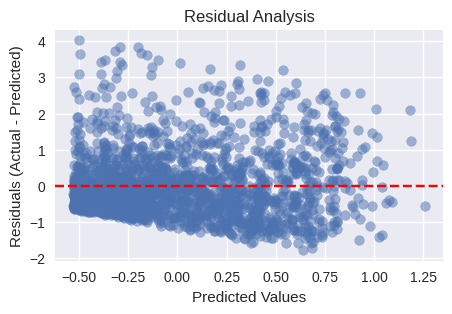

In [88]:
# 2. Residual Analysis Plot
plt.figure(figsize=(5, 3))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

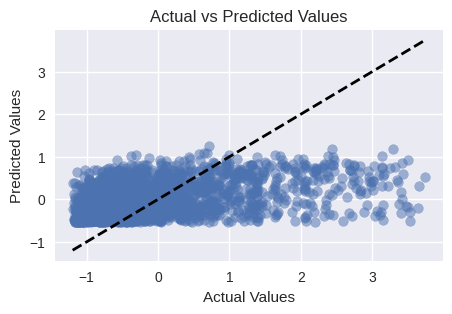

In [89]:
# 3. Actual vs Predicted Values Plot
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

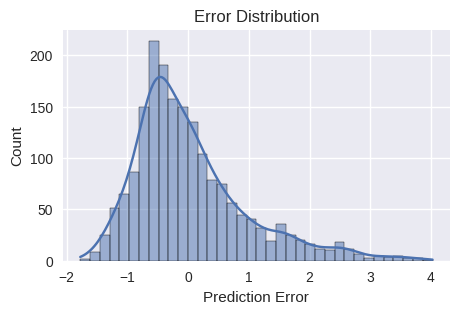

In [91]:
# 4. Error Distribution Plot
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.show()

#### <div style="color: blue;">2. Hyperparameter Tuning:</div>


In [94]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the model-building function
def build_regression_model(hp):
    model = keras.Sequential()
    
    # Tune number of layers
    num_layers = hp.Int('num_layers', 2, 4)
    
    for i in range(num_layers):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(
                hp.Float('l2_reg', 1e-4, 1e-2, sampling='log')
            )
        ))
        model.add(layers.Dropout(
            hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)
        ))

    # Output layer
    model.add(layers.Dense(1))

    # Tune learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_regression_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='ann_regression_tuning'
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Search for best hyperparameters (use a fixed batch_size here)
tuner.search(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64,  # Fixed for tuning
    callbacks=[early_stop],
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal hyperparameters:
- Number of layers: {best_hps.get('num_layers')}
- Learning rate: {best_hps.get('learning_rate')}
- L2 Regularization: {best_hps.get('l2_reg')}
""")

# Build final model with best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Train the final model
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Evaluate final model
loss, mae = final_model.evaluate(X_test, y_test)
print(f"Final Model Test MSE: {loss:.4f}")
print(f"Final Model Test MAE: {mae:.4f}")


Trial 20 Complete [00h 00m 43s]
val_loss: 0.8120605051517487

Best val_loss So Far: 0.7942194044589996
Total elapsed time: 00h 11m 50s

Optimal hyperparameters:
- Number of layers: 3
- Learning rate: 0.001
- L2 Regularization: 0.00010787025460398484

Epoch 1/200
117/117 - 7s - 56ms/step - loss: 0.9379 - mae: 0.7398 - val_loss: 0.9195 - val_mae: 0.7075 - learning_rate: 0.0010
Epoch 2/200
117/117 - 0s - 2ms/step - loss: 0.8821 - mae: 0.7077 - val_loss: 0.9180 - val_mae: 0.7069 - learning_rate: 0.0010
Epoch 3/200
117/117 - 0s - 2ms/step - loss: 0.8567 - mae: 0.6975 - val_loss: 0.9227 - val_mae: 0.6980 - learning_rate: 0.0010
Epoch 4/200
117/117 - 0s - 2ms/step - loss: 0.8582 - mae: 0.6979 - val_loss: 0.9146 - val_mae: 0.7013 - learning_rate: 0.0010
Epoch 5/200
117/117 - 0s - 2ms/step - loss: 0.8382 - mae: 0.6880 - val_loss: 0.8943 - val_mae: 0.6976 - learning_rate: 0.0010
Epoch 6/200
117/117 - 0s - 2ms/step - loss: 0.8336 - mae: 0.6814 - val_loss: 0.8965 - val_mae: 0.7030 - learning_rate:

##### Observations:

1. Architecture & Regularization:
  - 2-4 Hidden layers (256-32 neurons) with ReLU activation
  - Regularization:
    - L2 Weight Penalty (0.01 strength)
    - Dropout (20-50%)
    - Batch Normalization
  - Output: Linear layer for regression

2. Hyperparameter Tuning
  - Optimized via Random Search (20 trials):
    - Learning Rate: 1e-4 to 1e-3
    - Batch Size: 32-128
    - Layer Configuration: 2-4 hidden layers
  - Training Protocol:
    - Early Stopping (patience=15)
    - Learning Rate Scheduling (factor=0.5)

4. Improvement Recommendations
   - Architectural: Add residual connections/attention mechanisms
   - Data: Investigate high-error samples for patterns
   - Ensemble: Stack with gradient boosting models
   - Monitoring: Implement prediction error thresholds:

#### <div style="color: blue;">3. Cross-Validation::</div>

In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Number of folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store scores
mse_scores = []
mae_scores = []
r2_scores = []

# Cross-validation loop
for train_idx, val_idx in kfold.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Build model using best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # Train
    model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=64,
        callbacks=[early_stop, lr_scheduler],
        verbose=0
    )

    # Predict and evaluate
    y_pred = model.predict(X_val_fold).flatten()
    mse_scores.append(mean_squared_error(y_val_fold, y_pred))
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred))
    r2_scores.append(r2_score(y_val_fold, y_pred))

# Summary of cross-validation
print(f"\nCross-Validation Results (5-Fold):")
print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 51: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.000125000

##### Observations

- `Average MSE (0.8248)`: The model's predictions have an average squared error of ~0.82, which still suggests there's considerable room for improvement in prediction accuracy.

- `Average MAE (0.6831)`: On average, the predicted price deviates from the actual value by about 0.68 units, indicating moderate error.

- `Average R² Score (0.1754)`: The model explains only ~17.5% of the variance in the target variable, implying that it captures a limited amount of predictive signal in the data.

#### <div style="color: blue;">4. Ensemble Methods:</div>


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [98]:
svr = SVR()
linr = LinearRegression()
dtr = DecisionTreeRegressor(max_depth=5)
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
abr = AdaBoostRegressor(n_estimators=50, random_state=2)
bgr = BaggingRegressor(n_estimators=50, random_state=2)
etr = ExtraTreesRegressor(n_estimators=50, random_state=2)
gbr = GradientBoostingRegressor(n_estimators=50, random_state=2)
xgbr = XGBRegressor(n_estimators=50, random_state=2)

In [99]:
clfs = {
'SVR': svr,
'LinearRegression': linr,
'DT': dtr,
'RF': rfr,
'AdaBoost': abr,
'Bagging': bgr,
'ExtraTrees': etr,
'GBDT': gbr,
'XGBoost': xgbr
}

In [102]:
def train_regressor(reg, X_train, y_train, X_test, y_test):
    try:
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        return mse, rmse, mae, r2
    except Exception as e:
        print(f"Error with regressor {reg.__class__.__name__}: {str(e)}")
        return None, None, None, None

In [103]:
#Evaluate performance

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

for name, reg in clfs.items():
    current_mse, current_rmse, current_mae, current_r2 = train_regressor(reg, X_train, y_train, X_test, y_test)
    
    print(f"Results for {name}:")
    print(f"  MSE  - {current_mse:.4f}")
    print(f"  RMSE - {current_rmse:.4f}")
    print(f"  MAE  - {current_mae:.4f}")
    print(f"  R²   - {current_r2:.4f}")
    
    mse_scores.append(current_mse)
    rmse_scores.append(current_rmse)
    mae_scores.append(current_mae)
    r2_scores.append(current_r2)


Results for SVR:
  MSE  - 0.9347
  RMSE - 0.9668
  MAE  - 0.6719
  R²   - 0.1202
Results for LinearRegression:
  MSE  - 0.8948
  RMSE - 0.9460
  MAE  - 0.7050
  R²   - 0.1577
Results for DT:
  MSE  - 0.7818
  RMSE - 0.8842
  MAE  - 0.6426
  R²   - 0.2642
Results for RF:
  MSE  - 0.6885
  RMSE - 0.8298
  MAE  - 0.5955
  R²   - 0.3519
Results for AdaBoost:
  MSE  - 1.0402
  RMSE - 1.0199
  MAE  - 0.8809
  R²   - 0.0209
Results for Bagging:
  MSE  - 0.6858
  RMSE - 0.8281
  MAE  - 0.5952
  R²   - 0.3545
Results for ExtraTrees:
  MSE  - 0.8136
  RMSE - 0.9020
  MAE  - 0.6481
  R²   - 0.2342
Results for GBDT:
  MSE  - 0.7071
  RMSE - 0.8409
  MAE  - 0.6096
  R²   - 0.3345
Results for XGBoost:
  MSE  - 0.6405
  RMSE - 0.8003
  MAE  - 0.5647
  R²   - 0.3972


##### Observations:

- XGBoost is the most effective model for this problem, achieving the lowest MSE/MAE and highest R² score.

- Bagging and Random Forest are reliable alternatives with strong generalization.

- Linear models and SVR underperform, likely due to non-linear patterns in the data.

- AdaBoost is not well-suited for this task and should be avoided.

##### Summary Observations:
- The ANN model significantly underperforms compared to XGBoost and other top ML models across all key regression metrics.

- XGBoost demonstrates superior predictive accuracy and generalization, achieving the lowest MSE, MAE, and highest R² score.

- The ANN model may be underfitting or not optimized enough — possibly due to:

  - Insufficient feature engineering or scaling,
  - Suboptimal architecture or hyperparameters,
  - Lack of data for deep learning to generalize well.

- Traditional ensemble models (XGBoost, Random Forest, Bagging) handle tabular data much better without requiring deep architectures.